In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [2]:
#Cridit Card Frauds
#Online Frauds
#Online take overload
###data_url = "https://github.com/jonwancodes/"
###df = pd.read_csv(
   ### data_url + "HABdata_2019_2022.csv")
###data_url = "https://www.datacamp.com/datalab/w/bc80400e-1729-40ae-94ea-7ded28ab69e9/edit#active-belize"
df = pd.read_csv("/content/creditcard.csv")



In [3]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109020,71183,-4.374232,4.597323,-2.666504,-0.495896,-0.335102,1.979937,-5.900575,-11.761583,-2.595467,...,-6.200810,1.783418,0.631746,-1.187762,-0.086872,0.155966,-0.524525,0.190889,0.76,0.0
109021,71184,-0.764535,-0.169528,2.400210,-2.646822,-1.295989,-0.560579,-0.376060,-0.020719,-1.946566,...,-0.094532,0.343778,-0.302877,0.483442,0.352366,-0.219257,0.249637,-0.046422,4.80,0.0
109022,71184,-0.729627,0.652197,1.544893,-1.142110,0.013696,-0.330441,0.720784,-0.057366,0.836247,...,-0.115648,0.216192,-0.174437,0.149820,-0.233584,0.907150,0.239993,0.012831,10.00,0.0
109023,71184,1.216414,-0.913359,1.163761,-0.386409,-1.603284,-0.362882,-0.984403,-0.046064,-0.166277,...,0.172531,0.510539,-0.088030,0.447209,0.374703,-0.207254,0.048581,0.041604,78.00,0.0


In [4]:
#Eda on the dataset
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0
6,4,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0.0
7,7,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0.0
8,7,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0.0
9,9,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0.0


In [5]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [6]:
df.duplicated().sum()

np.int64(429)

In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [9]:
mostOccuredClass = df['Class'].mode()[0]
mostOccuredClass

np.float64(0.0)

In [10]:
AverageAmount = df['Amount'].mean()
AverageAmount

np.float64(95.97665486498384)

In [11]:
df['Class'].fillna(mostOccuredClass, inplace=True)

/tmp/ipython-input-11-211336657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Class'].fillna(mostOccuredClass, inplace=True)


In [12]:
df['Amount'].fillna(AverageAmount, inplace=True)

/tmp/ipython-input-12-2384763631.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(AverageAmount, inplace=True)


In [13]:
df.isna().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [14]:
#Statistics / Logistic Regression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

In [15]:
cc_data = df.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 109024 entries, 0 to 109023
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    109024 non-null  int64  
 1   V1      109024 non-null  float64
 2   V2      109024 non-null  float64
 3   V3      109024 non-null  float64
 4   V4      109024 non-null  float64
 5   V5      109024 non-null  float64
 6   V6      109024 non-null  float64
 7   V7      109024 non-null  float64
 8   V8      109024 non-null  float64
 9   V9      109024 non-null  float64
 10  V10     109024 non-null  float64
 11  V11     109024 non-null  float64
 12  V12     109024 non-null  float64
 13  V13     109024 non-null  float64
 14  V14     109024 non-null  float64
 15  V15     109024 non-null  float64
 16  V16     109024 non-null  float64
 17  V17     109024 non-null  float64
 18  V18     109024 non-null  float64
 19  V19     109024 non-null  float64
 20  V20     109024 non-null  float64
 21  V21     109024 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,...,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000,109024.000000
mean,44645.033286,-0.256874,-0.025150,0.682025,0.156140,-0.283856,0.096428,-0.115881,0.058903,-0.058147,...,-0.031439,-0.108487,-0.037077,0.010548,0.133002,0.025850,0.001697,0.001575,95.976655,0.002192
std,17910.858247,1.851924,1.646560,1.312694,1.342228,1.344998,1.297958,1.204308,1.228836,1.107862,...,0.739326,0.639778,0.625171,0.595426,0.439685,0.491488,0.392049,0.319122,259.985100,0.046770
min,0.000000,-56.407510,-72.715728,-33.680984,-5.172595,-42.147898,-26.160506,-31.764946,-73.216718,-9.283925,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.534330,-9.390980,-9.617915,0.000000,0.000000
25%,34466.000000,-1.022531,-0.594717,0.176658,-0.711430,-0.906798,-0.647205,-0.604944,-0.134457,-0.698269,...,-0.224526,-0.535608,-0.176381,-0.323376,-0.130809,-0.323685,-0.061028,-0.004984,7.000000,0.000000
50%,46486.000000,-0.260719,0.078833,0.757588,0.184481,-0.318226,-0.156138,-0.071019,0.077630,-0.124568,...,-0.057137,-0.084788,-0.049097,0.066487,0.170840,-0.068262,0.010695,0.023386,25.000000,0.000000
75%,59079.000000,1.155067,0.739991,1.382008,1.021482,0.243522,0.490659,0.410308,0.368873,0.536947,...,0.120029,0.312712,0.080875,0.407577,0.420394,0.293750,0.084706,0.076715,86.982500,0.000000
max,71184.000000,1.960497,18.902453,4.226108,16.715537,34.801666,22.529298,36.677268,20.007208,10.392889,...,27.202839,10.503090,19.002942,4.016342,5.541598,3.517346,12.152401,33.847808,19656.530000,1.000000


In [16]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               109024
Model:                            GLM   Df Residuals:                   108994
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -541.85
Date:                Mon, 30 Jun 2025   Deviance:                       1083.7
Time:                        01:21:17   Pearson chi2:                 1.47e+05
No. Iterations:                    14   Pseudo R-squ. (CS):            0.02106
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.1301      0.472    -19.332      0.0

In [17]:
# Columns to keep
target_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]
cc_data.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0.0


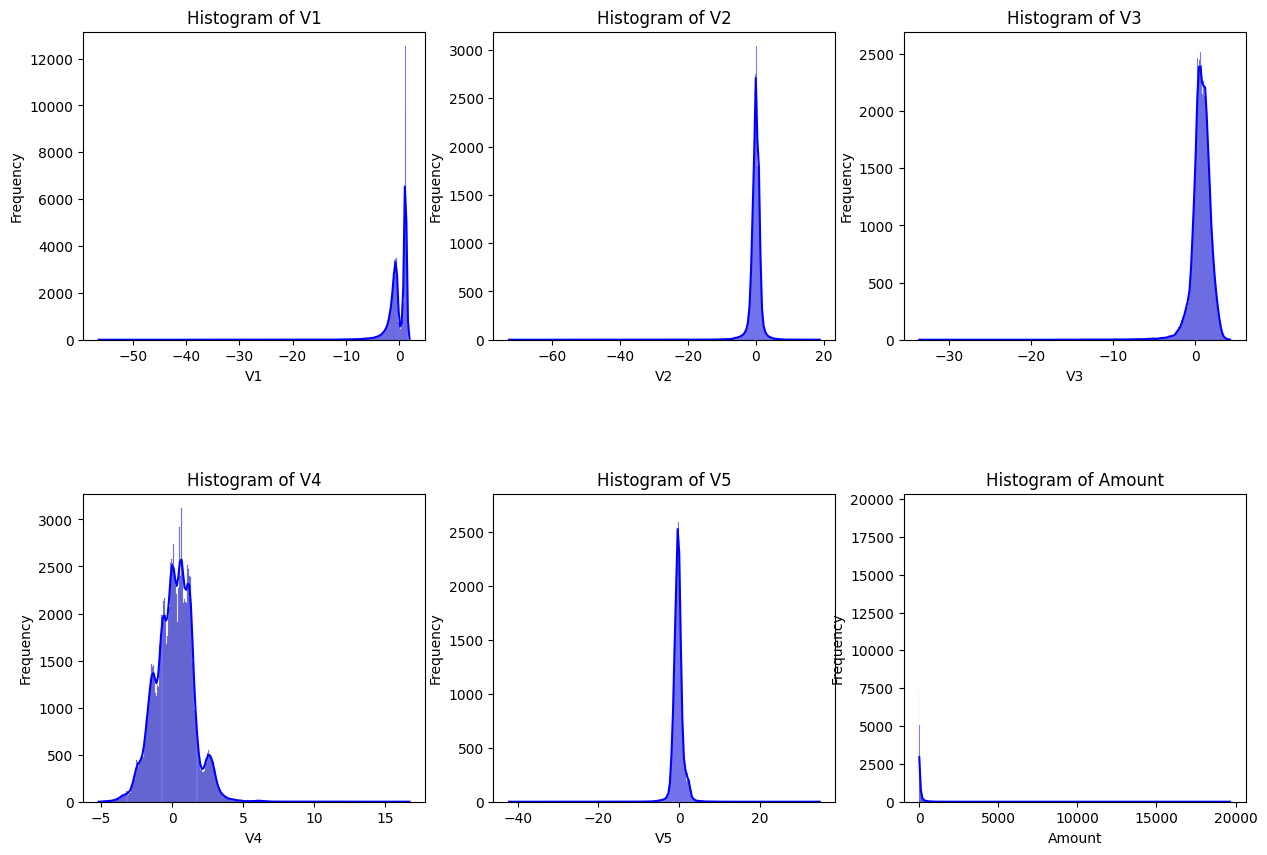

In [18]:
# Define the columns you want to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

/tmp/ipython-input-19-3291220950.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=cc_data, palette='Set1')


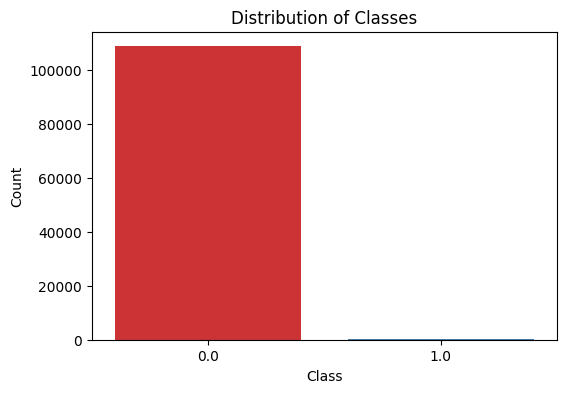

Count of Fraudulent Transactions: 108785
Count of Non-Fraudulent Transactions: 239


In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=cc_data, palette='Set1')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

fraud_count = (cc_data['Class']==0).sum()
nonfraud_count = (cc_data['Class']==1).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)

In [20]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
logit_eq = 'Class~V1+V2+V3+V4+V5'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               109024
Model:                            GLM   Df Residuals:                   109018
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -798.76
Date:                Mon, 30 Jun 2025   Deviance:                       1597.5
Time:                        01:22:15   Pearson chi2:                 1.28e+05
No. Iterations:                    11   Pseudo R-squ. (CS):            0.01643
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2039      0.177    -46.450      0.0

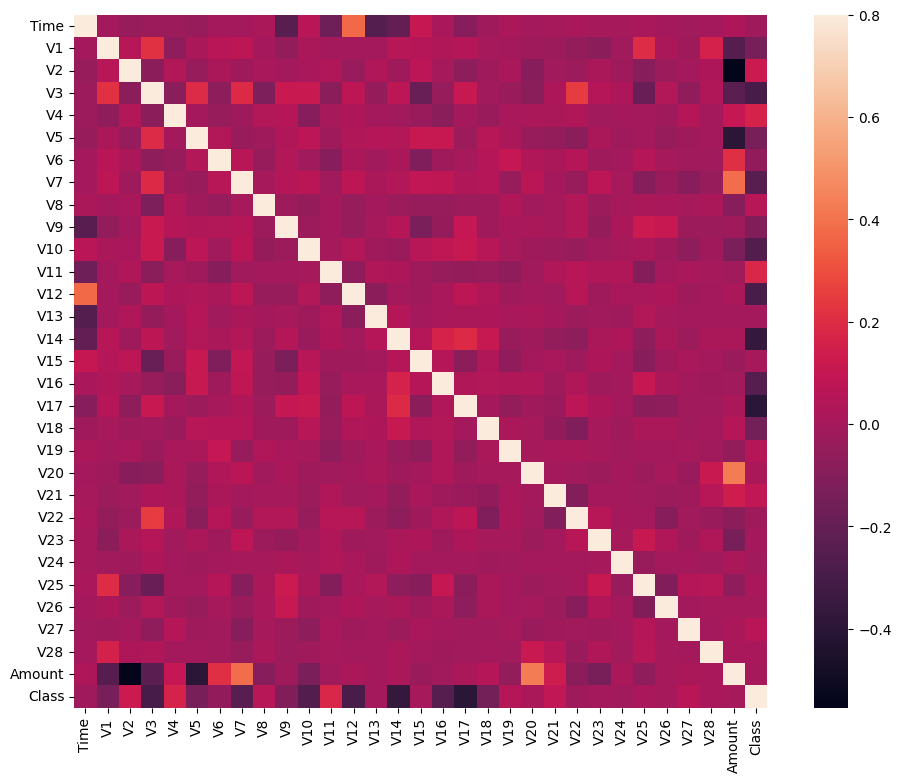

In [21]:
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

In [22]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
print(X.shape)
print(Y.shape)

xData = X.values
yData = Y.values

from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(
        xData, yData, test_size = 0.2, random_state = 42)

(109024, 30)
(109024,)


In [23]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(xTrain, yTrain)

yPred = rfc.predict(xTest)
yPred

array([0., 0., 0., ..., 0., 0., 0.])

Model Evaluation Metrics:
Accuracy: 0.9994
Precision: 1.0000
Recall: 0.7818
F1-Score: 0.8776
Matthews Correlation Coefficient: 0.8840


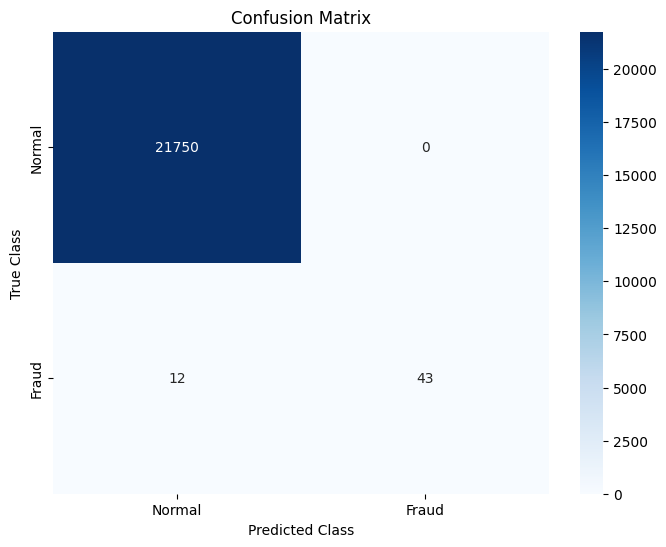

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, confusion_matrix
accuracy = accuracy_score(yTest, yPred)
precision = precision_score(yTest, yPred)
recall = recall_score(yTest, yPred)
f1 = f1_score(yTest, yPred)
mcc = matthews_corrcoef(yTest, yPred)

print("Model Evaluation Metrics:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient: {mcc:.4f}")

conf_matrix = confusion_matrix(yTest, yPred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Normal', 'Fraud'], yticklabels=['Normal', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

In [25]:
###The model accuracy is high due to class imbalance so we will have computed precision, recall and f1 score to get a more meaningful understanding. We observe:

###Accuracy: 0.9993: Out of all predictions, 99.94% were correct. However, in imbalanced datasets (like fraud detection), accuracy can be misleading i.e. a model that predicts everything as "not fraud" will still have high accuracy.
###Precision: 1: When the model predicted "fraud", it was correct 100% of the time. High precision means very few false alarms (false positives).
###Recall: 0.83: Out of all actual fraud cases, the model detected 79.59%. This shows how well it catches real frauds. A lower recall means some frauds were missed (false negatives).
###F1-Score: 0.91: A balance between precision and recall. 91% is strong and shows the model handles both catching fraud and avoiding false alarms well.
###Matthews Correlation Coefficient (MCC): 0.91: A more balanced score (from -1 to +1) even when classes are imbalanced. A value of 0.91 is very good, it means the model is making strong, balanced predictions overall.
###We can balance dataset by oversampling the minority class or by undersampling the majority class we can increase accuracy of our model.

In [26]:
#SMOTE
from sklearn.preprocessing import StandardScaler

df['normAmount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Time', 'Amount'], axis=1)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.0,0.206333
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0.0,-0.358817
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0.0,1.087311
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.0,0.105866
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.0,-0.099955


In [27]:
X = df.drop(['Class'], axis = 1)
Y = df["Class"]
##print(X.shape)
##print(Y.shape)



###X = np.array(df.ix[:, df.columns != 'Class'])
###y = np.array(df.ix[:, df.columns == 'Class'])
print('Shape of X: {}'.format(X.shape))
print('Shape of y: {}'.format(Y.shape))
xData = X.values
yData = Y.values

Shape of X: (109024, 29)
Shape of y: (109024,)


In [28]:
!pip install imblearn -U

In [29]:
from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (76316, 29)
Number transactions y_train dataset:  (76316,)
Number transactions X_test dataset:  (32708, 29)
Number transactions y_test dataset:  (32708,)


In [30]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
###SMOTE(random_state=42).fit_resample(X_trainC, y_trainC)
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 163
Before OverSampling, counts of label '0': 76153 



/tmp/ipython-input-30-3166882504.py:5: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())


After OverSampling, the shape of train_X: (152306, 29)
After OverSampling, the shape of train_y: (152306,) 

After OverSampling, counts of label '1': 76153
After OverSampling, counts of label '0': 76153


In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report

parameters = {
    'C': np.linspace(1, 10, 10)
             }
lr = LogisticRegression()
clf = GridSearchCV(lr, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train_res, y_train_res.ravel())

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=3,
             param_grid={'C': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             verbose=5)

In [32]:
clf.best_params_

{'C': np.float64(10.0)}

In [33]:
lr1 = LogisticRegression(C=4,penalty='l2', verbose=5)
lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s finished


LogisticRegression(C=4, verbose=5)

In [34]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    else:
        1#print('Confusion matrix, without normalization')

    #print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Recall metric in the train dataset: 93.86503067484662%


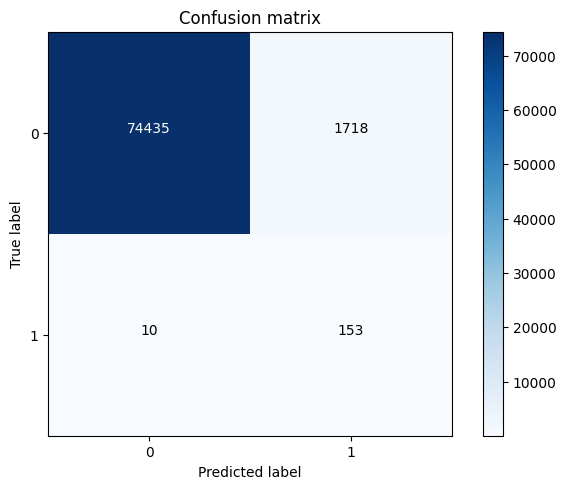

In [35]:
y_train_pre = lr1.predict(X_train)

cnf_matrix_tra = confusion_matrix(y_train, y_train_pre)

print("Recall metric in the train dataset: {}%".format(100*cnf_matrix_tra[1,1]/(cnf_matrix_tra[1,0]+cnf_matrix_tra[1,1])))


class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix_tra , classes=class_names, title='Confusion matrix')
plt.show()

Recall metric in the testing dataset: 90.78947368421052%


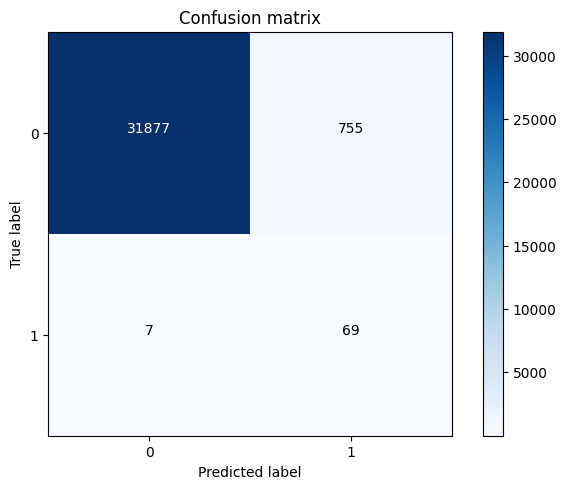

In [36]:
y_pre = lr1.predict(X_test)

cnf_matrix = confusion_matrix(y_test, y_pre)

print("Recall metric in the testing dataset: {}%".format(100*cnf_matrix[1,1]/(cnf_matrix[1,0]+cnf_matrix[1,1])))
#print("Precision metric in the testing dataset: {}%".format(100*cnf_matrix[0,0]/(cnf_matrix[0,0]+cnf_matrix[1,0])))
# Plot non-normalized confusion matrix
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix , classes=class_names, title='Confusion matrix')
plt.show()

In [37]:
tmp = lr1.fit(X_train_res, y_train_res.ravel())

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s finished


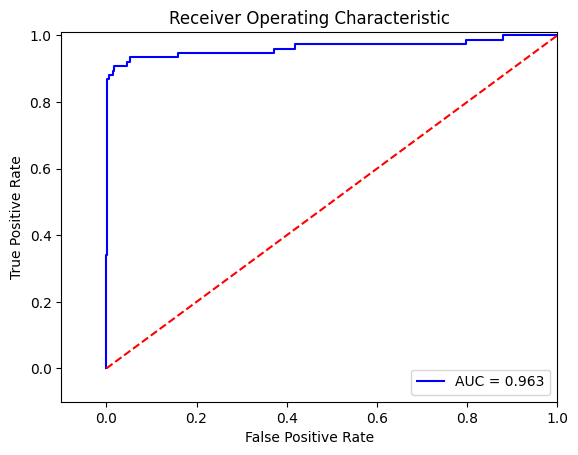

In [38]:
y_pred_sample_score = tmp.decision_function(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_sample_score)

roc_auc = auc(fpr,tpr)

# Plot ROC
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b',label='AUC = %0.3f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.0])
plt.ylim([-0.1,1.01])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
roc_auc
#https://www.kaggle.com/code/qianchao/smote-with-imbalance-data

np.float64(0.9634161978555116)